<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assumptions" data-toc-modified-id="Assumptions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assumptions</a></span></li><li><span><a href="#Environment" data-toc-modified-id="Environment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Environment</a></span></li><li><span><a href="#Brain-(Model)" data-toc-modified-id="Brain-(Model)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Brain (Model)</a></span></li><li><span><a href="#Deep-Q-learning" data-toc-modified-id="Deep-Q-learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Deep Q learning</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Breaking-down-the-train-part...." data-toc-modified-id="Breaking-down-the-train-part....-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Breaking down the train part....</a></span><ul class="toc-item"><li><span><a href="#DQN---get-batch-breakdown" data-toc-modified-id="DQN---get-batch-breakdown-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>DQN - get batch breakdown</a></span></li></ul></li></ul></div>

- https://github.com/PacktPublishing/AI-Crash-Course/tree/master/Chapter%2011
- https://www.udemy.com/course/ai-for-business/learn/lecture/12443602#questions

In [67]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import Adam

# Assumptions

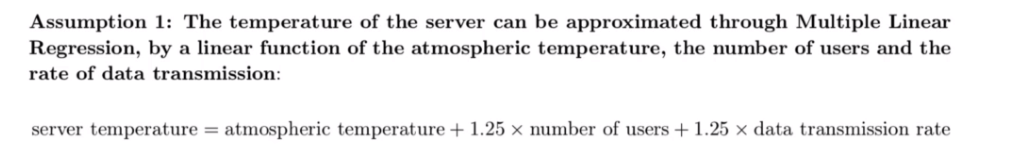

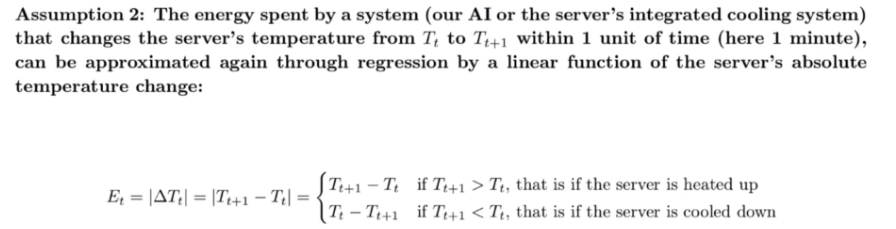

# Environment 

In [ ]:
class Environment():
    def __init__():
        
        

In [130]:
class Environment():
    def __init__(self, 
                 OptimalTemperature = (18,24),
                 InitialMonth = 0,
                 InitialNumUsers = 10,
                 InitialRateData = 60):
        self.monthyTemperature = [1.0, 5.0, 7.0, 10.0, 11.0, 20.0, 23.0, 24.0, 22.0, 10.0, 5.0, 1.0]
        self.InitialMonth = InitialMonth
        self.currentMonthyTemperature = self.monthyTemperature[InitialMonth]
        self.OptimalTemperature = OptimalTemperature
        self.minTemperature = -20
        self.maxTemperature = 80
        self.minNumUsers = 10
        self.maxNumUsers = 100
        self.maxUpdateUsers = 5
        self.minRateData = 20
        self.maxRateData = 300
        self.maxUpdateData = 10
        self.InitialNumUsers = InitialNumUsers
        self.currentNumUsers = InitialNumUsers
        self.InitialRateData = InitialRateData
        self.currentRateData = InitialRateData
        self.ServerTemperature = self.currentMonthyTemperature + 1.25*self.currentNumUsers + 1.25*self.currentRateData
        self.TempAI = self.ServerTemperature
        self.TempNoAI = (self.OptimalTemperature[0] + self.OptimalTemperature[1]) / 2.0  
        self.TotalEnergyAI = 0.0
        self.TotalEnergyNoAI = 0.0
        self.reward = 0.0
        self.gameOver = 0  # 1 means over
        self.trainModel = 1
        
    
    
    # Make the method that updates the system right after AI makes an action'''
    # direction: the direction of temperature change that our A.I. causes onto the server. 1:heats up the server, -1: cool down server   
    def update_env(self, energyAI, month):
        
        
        ''' GETTING REWARDS '''
        # compute the energy spend by the server when there is no AI
        energyNoAI = 0 
        
        # no AI 如果当前温度小于最佳温度的下线  TempNoAI = (18+24)/2 = 21 
        if self.TempNoAI < self.OptimalTemperature[0]:
            print(f'没AI的时候当前温度小于{OptimalTemperature[0]}')
            energyNoAI = self.OptimalTemperature[0] - self.TempNoAI
            self.TempNoAI = self.OptimalTemperature[0]  # bring it up to lower bound of optimal temperature 
        
        elif self.TempNoAI > self.OptimalTemperature[1]:
            print(f'没AI的时候当前温度大于{OptimalTemperature[1]}')
            energyNoAI = self.TempNoAI - self.OptimalTemperature[1] 
            self.TempNoAI = self.OptimalTemperature[1]  # 太烫了减小一点
            
        self.reward = (energyNoAI - energyAI) * 0.01 # scaling facter  
            
            
            
        
        
        
        ''' GETTING THE NEXT STATE '''
        # update the current month temp
        self.currentMonthyTemperature =  self.monthyTemperature[month]
        
        # update current # of users 
        self.currentNumUsers += np.random.randint(-self.maxUpdateUsers, self.maxUpdateUsers) 
        if self.currentNumUsers > self.maxNumUsers:
            self.currentNumUsers = self.maxNumUsers
        elif self.currentNumUsers < self.minNumUsers:
            self.currentNumUsers = self.minNumUsers
        
        
        # update current rate of data
        self.currentRateData += np.random.randint(-self.maxUpdateData, self.maxUpdateData) 
        if self.currentRateData > self.maxRateData:
            self.currentRateData = self.maxRateData
        elif self.currentRateData < self.minRateData:
            self.currentRateData = self.minRateData
                
        
        # compute the detla of ServerTemperature (change of server temp)
        pastServerTemperature = self.ServerTemperature
        self.ServerTemperature = self.currentMonthyTemperature + 1.25*self.currentNumUsers + 1.25*self.currentRateData
        detlaST = self.ServerTemperature - pastServerTemperature
        
        '''
        # compute the detla of temperature caused by AI
        if direction == -1:
            detlaSTbyAI = -energyAI
        elif direction == 1:
             detlaSTbyAI = energyAI
        
        
        # update the server's temperature when there is the AI
        self.TempAI += detlaST + detlaSTbyAI
        
        # update the server's temperature when there is no AI
        self.TempNoAI += detlaST
        
        '''
        # update the server's temperature when there is the AI
        self.TempAI += detlaST + energyAI
        
        # update the server's temperature when there is no AI
        self.TempNoAI += detlaST        
        
        
        
        
        '''GAME OVER'''
        if self.TempAI < self.minTemperature:
            if self.trainModel == 1:
                self.gameOver = 1
            else:
                self.TempAI = self.OptimalTemperature[0]
                self.TotalEnergyAI += self.OptimalTemperature[0] - self.TempAI    #####mistake####
            
        elif self.TempAI > self.maxTemperature:
            if self.trainModel == 1:
                self.gameOver = 1
            else:
                self.TempAI = self.OptimalTemperature[1]
                self.TotalEnergyAI += self.TempAI - self.OptimalTemperature[1]    ####mistake#####
        
        
        
        '''UPDATE SCORES'''
        # update the total energy spend by the AI
        self.TotalEnergyAI += energyAI
        
        # update the total energy spend without AI
        self.TotalEnergyNoAI += energyNoAI
        

        '''SCALING THE STATE'''
        scaledTempAI = (self.TempAI - self.minTemperature) / (self.maxTemperature - self.minTemperature)
        scaledNumUsers =  (self.currentNumUsers - self.minNumUsers) / (self.maxNumUsers - self.minNumUsers)
        scaledRateData = (self.currentRateData - self.minRateData) / (self.maxRateData - self.minRateData)
        nextState = np.matrix([scaledTempAI, scaledNumUsers, scaledRateData])
        
        
        return nextState, self.reward, self.gameOver
        
        
    def reset(self, new_month):
        self.currentMonthyTemperature = self.monthyTemperature[new_month]
        self.InitialMonth = new_month
        self.currentNumUsers = self.InitialNumUsers
        self.currentRateData = self.InitialRateData
        self.ServerTemperature = self.currentMonthyTemperature + 1.25 * self.currentNumUsers + 1.25 * self.currentRateData
        self.TempAI = self.ServerTemperature    
        self.TempNoAI = (self.OptimalTemperature[0] + self.OptimalTemperature[1]) / 2.0  
        self.TotalEnergyAI = 0.0
        self.TotalEnergyNoAI = 0.0
        self.reward = 0.0
        self.gameOver = 0
        self.trainModel = 1        
        
        
    # observe our environment
    def observe(self):
        scaledTempAI = (self.TempAI - self.minTemperature) / (self.maxTemperature - self.minTemperature)
        scaledNumUsers =  (self.currentNumUsers - self.minNumUsers) / (self.maxNumUsers - self.minNumUsers)
        scaledRateData = (self.currentRateData - self.minRateData) / (self.maxRateData - self.minRateData)
        current_state = np.matrix([scaledTempAI, scaledNumUsers, scaledRateData])
        return current_state #self.reward, self.gameOver
        
        
        
        
        
        


In [3]:
env = Environment()

# 最初设定第一个月是1度， 10个人  server rate 是60 ---> 1+ 1.25*10+ 1.25*60 = 88.5
env.ServerTemperature

# (18+ 24) /2 = 21
env.TempNoAI

# env.ServerTemperature = 88.5
env.TempAI



'''现在update environment 需要其中一个 actionList = [-3,-1.5,0,1.5,3] 和 月份'''
# 降3°和 现在是3月份 
env.update_env(-3, 2)






In [8]:
env.update_env(-3, 2)

(matrix([[1.0025    , 0.        , 0.11071429]]), 0.03, 1)

In [10]:
env.currentMonthyTemperature

7.0

In [9]:
env.reward

0.03

In [ ]:
env.e

In [137]:
# self.currentMonthyTemperature + 1.25*self.currentNumUsers + 1.25*self.currentRateData
# 7 月是 1+ 1.25*10+ 1.25*60
env.ServerTemperature

114.0

In [143]:
1+ 1.25*10+ 1.25*60

88.5

# Brain (Model)

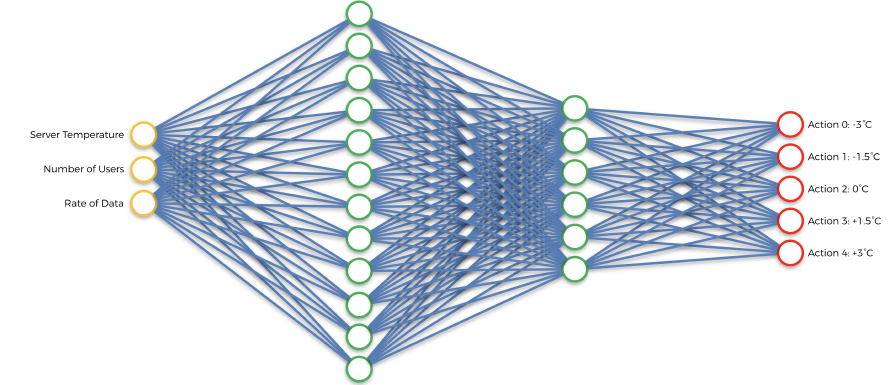

In [153]:
class Brain():
    def __init__(self, lr = 0.001, num_actions = 5):
        self.learningRate = lr
        self.numAction = num_actions
        states = Input(shape= (3))
        h1 = Dense(64, activation = 'sigmoid')(states)
        h2 = Dense(32, activation = 'sigmoid')(h1)
        qValues = Dense(num_actions, activation = 'softmax')(h2)
        self.model = Model(inputs = states, outputs = qValues)
        self.model.compile(loss = 'mse', optimizer = Adam(learning_rate = self.learningRate))
        
        

# Deep Q learning 

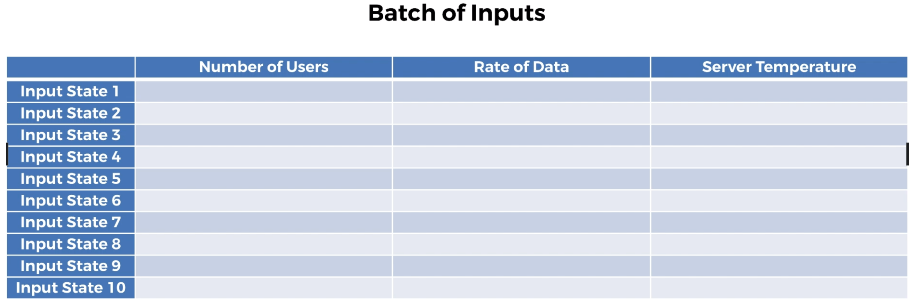

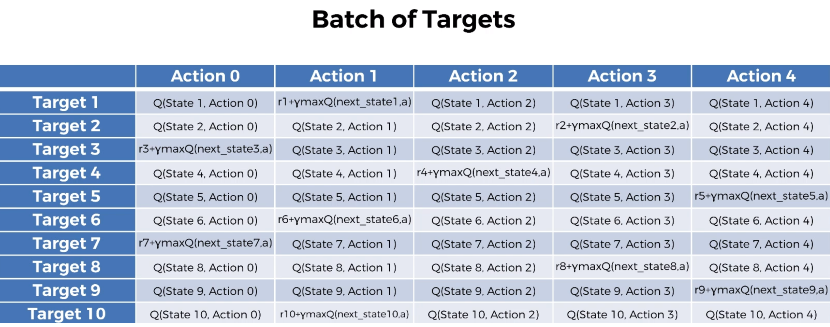

In [216]:
class DQN():
    
    def __init__(self, max_memory = 100, discount = 0.9):
        self.memory = list()
        self.maxMemory = max_memory
        self.discount = discount
        
        
        
    # build the memory in experience replay    
    def remember(self, transition, game_over):
        self.memory.append([transition, game_over])
        if len(self.memory) > self.maxMemory:
            del self.memory[0]
        
                            
    # 从transition里面找出2个 batch - inputs 和 targets                        
    def get_batch(self, model, batch_size = 10):
        
        '''
        inputs:
        array([[0., 0., 0.],
               [0., 0., 0.],
               [0., 0., 0.],
               [0., 0., 0.],
               [0., 0., 0.],
               [0., 0., 0.],
               [0., 0., 0.],
               [0., 0., 0.]])
        targets:
        array([[0., 0., 0., 0., 0.],
               [0., 0., 0., 0., 0.],
               [0., 0., 0., 0., 0.],
               [0., 0., 0., 0., 0.],
               [0., 0., 0., 0., 0.],
               [0., 0., 0., 0., 0.],
               [0., 0., 0., 0., 0.],
               [0., 0., 0., 0., 0.]])
        '''
        
        lenMemory = len(self.memory)
        numInputs = self.memory[0][0][0].shape[1] # 第一个是 transition， [current states, action played, reward received, next state]
        numOutputs = model.output_shape[-1] # eg: (None, 5)
        inputs = np.zeros((min(lenMemory, batch_size), numInputs))                  
        targets = np.zeros((min(lenMemory, batch_size), numOutputs ))      
                            
         
        for idx, value in enumerate(np.random.randint(0, lenMemory, size = min(lenMemory, batch_size))):
            current_state, action, reward, next_state = self.memory[value][0]
            game_over = self.memory[value][1]                
            inputs[idx] = current_state               
            targets[idx] = model.predict(current_state,verbose=0)[0]                
            qValue = np.max(model.predict(next_state,verbose=0)[0])                
            if game_over:
                targets[idx, action] = reward
            else:
                targets[idx, action] = reward + self.discount * qValue
        return inputs, targets           
                            

In [125]:
dqn = DQN(max_memory = 1000, discount = 0.9)

In [126]:
dqn

# Training

In [104]:
# setting up parameters 
epsilon = .3
numberActions = 5
epochs = 100
maxMemory = 3000
batchSize = 512
temperatureStep = 1.5 #(-3,-1.5,0, 1.5, 3)
actionList = [-3,-1.5,0,1.5,3]
periods = 5*30*24*60




# initilizating environment 
env = Environment(OptimalTemperature = (18.0, 24.0), InitialMonth = 0,  InitialNumUsers= 20, InitialRateData = 30)

# Model
brain = Brain(lr= 0.001, num_actions= numberActions)



# deep Q leanring 
dqn = DQN(max_memory= maxMemory, discount= 0.9)

# choose the mode
env.trainModel = True




for e in range(8):
    totalReward = 0
    loss = 0
    newMonth = np.random.randint(0,12)
    env.reset(newMonth)
     
        
    # matrix([[0.835     , 0.11111111, 0.03571429]])    
    currentState = env.observe()
    
    # (1 Timestep = 1 Minute) in iteration 
    timestep = 0
        
    # 5 months in minutes
    #while not env.gameOver and timestep <= periods:
        
        
    '''Exploration vs exploitation'''
    # play the action (exploration) 
    if np.random.rand() < epsilon:
        action = np.random.randint(0,numberActions)
        energyAI = actionList[action]

    # play the action predicted by the model    
    else:
        qValue = brain.model.predict(currentState)
        action = np.argmax(qValue)
        energyAI = actionList[action]


    '''Update the environment and the next state'''    
    # update the environment. def update_env(self, energyAI, month)
    nextState, reward, gameOver = env.update_env(energyAI, newMonth)

    totalReward += reward

    
    
    '''Experience replay'''
    # store the new transition into memory (experience replay)
    dqn.remember([currentState, action, reward, nextState], gameOver)

    
    # make input and target batchs 
    inputs, targets = dqn.get_batch(brain.model, batchSize)
    
    # compute the loss 
    loss += brain.model.train_on_batch(inputs, targets)
    
    timestep += 1
    currentState = nextState
    
    
    print('\n')
    print("Epoch: {:03d}/{:03d}".format(e, epochs))
    print(f'total energy spend without AI: {env.TotalEnergyNoAI}')

1/1 [==============================] - 0s 15ms/step


Epoch: 000/100
1/1 [==============================] - 0s 14ms/step


Epoch: 001/100
1/1 [==============================] - 0s 14ms/step


Epoch: 002/100
1/1 [==============================] - 0s 14ms/step


Epoch: 003/100
1/1 [==============================] - 0s 20ms/step


Epoch: 004/100
1/1 [==============================] - 0s 15ms/step


Epoch: 005/100
1/1 [==============================] - 0s 16ms/step


Epoch: 006/100
1/1 [==============================] - 0s 15ms/step


Epoch: 007/100


In [105]:
env.TotalEnergyNoAI

0.0

In [229]:
env1 = Environment(OptimalTemperature = (18.0, 24.0), InitialMonth = 0, InitialNumUsers = 20, InitialRateData = 30)
dqn = DQN(max_memory = 100, discount = 0.9)
brain = Brain()



actionList = [-3,-1.5,0,1.5,3]

for i in range(5):
    current_state = env1.observe()
    
    
    new_month = np.random.randint(0, 12)
    env1.reset(new_month = new_month)
    
    # 随机选action， 后面用model predict
    action = np.random.randint(0, number_actions)
    energyAI = actionList[action]
    
    # next_state, reward, game_over
    next_state, reward, game_over = env1.update_env(energyAI, new_month)
    
    
    #def remember(self, transition, game_over):
    dqn.remember([current_state, action, reward, next_state], game_over)    
    
    #def get_batch(self, model, batch_size = 10):
    inputs, targets = dqn.get_batch(brain.model, batch_size = 10)

    loss = brain.model.train_on_batch(inputs, targets)
    print(loss)

0.002014634432271123
0.004162685479968786
0.0027907940093427896
0.004676101729273796
0.0024118670262396336


In [226]:
inputs

array([[0.835     , 0.11111111, 0.03571429],
       [0.7125    , 0.05555556, 0.00714286],
       [1.1575    , 0.14444444, 0.05714286],
       [1.1575    , 0.14444444, 0.05714286],
       [1.1575    , 0.14444444, 0.05714286]])

In [227]:
targets

array([[0.24533468, 0.54115498, 0.        , 0.04928647, 0.06064146],
       [0.24510466, 0.015     , 0.10350903, 0.04905409, 0.06021871],
       [0.24603169, 0.50123868, 0.10373908, 0.04985899, 0.06164141],
       [0.24603169, 0.50123868, 0.10373908, 0.04985899, 0.06164141],
       [0.24603169, 0.50123868, 0.10373908, 0.04985899, 0.06164141]])

# Breaking down the train part....

## DQN - get batch breakdown 

In [169]:
lenMemory

100

In [166]:
lenMemory = len(dqn.memory)
batch_size = 10

numInputs = dqn.memory[0][0][0].shape[1] # 3 inputs
numOutputs = brain.model.output_shape[-1] # eg: (None, 5)
inputs = np.zeros((min(lenMemory, batch_size), numInputs))
inputs

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [167]:
targets = np.zeros((min(lenMemory, batch_size), numOutputs ))
targets

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [197]:
#np.random.randint(0, lenMemory, size = min(lenMemory, batchSize))
#array([3, 1, 3, 0, 5, 0, 7, 6])

for idx, value in enumerate(np.random.randint(0, lenMemory, size = min(lenMemory, batch_size))):
    
    current_state, action, reward, next_state = dqn.memory[value][0]
    game_over = dqn.memory[value][1]
    
    inputs[idx] = current_state  
    targets[idx] = brain.model.predict(current_state)[0] 
    qValue = np.max(brain.model.predict(next_state)[0])       
    
    
   
  

1/1 [==============================] - 0s 14ms/step


In [198]:
inputs, targets

(array([[0.8       , 0.05555556, 0.01071429],
        [0.7725    , 0.08888889, 0.00357143],
        [1.005     , 0.13333333, 0.01428571],
        [0.875     , 0.07777778, 0.04642857],
        [0.9625    , 0.12222222, 0.05714286],
        [0.94      , 0.1       , 0.05357143],
        [0.8725    , 0.1       , 0.05      ],
        [0.9275    , 0.15555556, 0.01785714],
        [0.9325    , 0.1       , 0.05      ],
        [0.75      , 0.11111111, 0.        ]]),
 array([[0.33394033, 0.14484784, 0.06528459, 0.14906745, 0.30685979],
        [0.33390269, 0.14484721, 0.06524688, 0.14910193, 0.30690131],
        [0.3335233 , 0.14532432, 0.06491877, 0.14968289, 0.30655065],
        [0.33393061, 0.14495611, 0.06514704, 0.1493108 , 0.30665547],
        [0.33377054, 0.14515686, 0.06496356, 0.14961484, 0.30649421],
        [0.33382526, 0.1450939 , 0.06503319, 0.14950538, 0.30654228],
        [0.33391386, 0.14497161, 0.06510222, 0.14937261, 0.3066397 ],
        [0.33361986, 0.14519738, 0.06494876, 0.1

In [177]:
reward

-0.015

In [87]:
brain.model.predict(next_state)[0]

1/1 [==============================] - 0s 14ms/step


array([0.16470388, 0.2721144 , 0.15107256, 0.14082554, 0.27128357],
      dtype=float32)

In [97]:
brain.model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_18 (Dense)            (None, 64)                256       
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


In [99]:
brain.model.train_on_batch(inputs, targets)

0.007216657977551222